In [2]:
import os

os.chdir("..")

In [3]:
import torch
from diffusers.pipelines import FluxPipeline
from src.flux.condition import Condition
from PIL import Image

from src.flux.generate import generate, seed_everything

In [4]:
pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev",cache_dir="cache", torch_dtype=torch.bfloat16
)
pipe = pipe.to("cuda")
# pipe.load_lora_weights(
#     "Yuanshi/OminiControl",
#     weight_name=f"omini/subject_512.safetensors",
#     adapter_name="subject",
# )

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
pipe.load_lora_weights(
    "examples/12000/pytorch_lora_weights.safetensors",
     adapter_name="subject",
)

  0%|          | 0/48 [00:00<?, ?it/s]

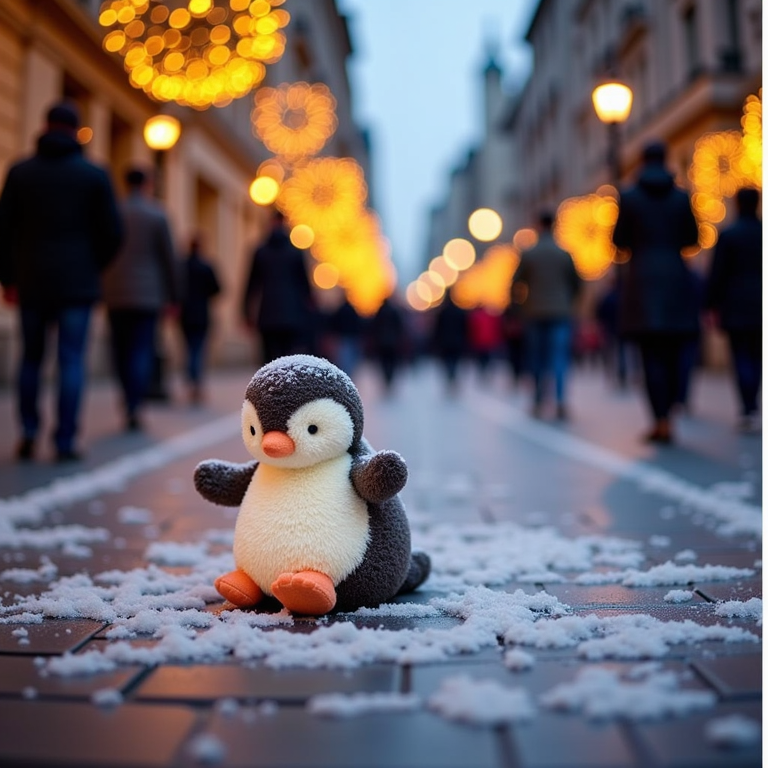

In [34]:
image = Image.open("assets/test_out.jpg").convert("RGB").resize((768, 768))

condition = Condition("subject", image, position_delta=(0, -48))

prompt = "On Christmas evening, on a crowded sidewalk, this item sits on the road, covered in snow ,t"


# seed_everything(100)


result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=48,
    height=768,
    width=768,
).images[0]


concat_image = Image.new("RGB", (768*2, 768))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (768, 0))
concat_image


result_img

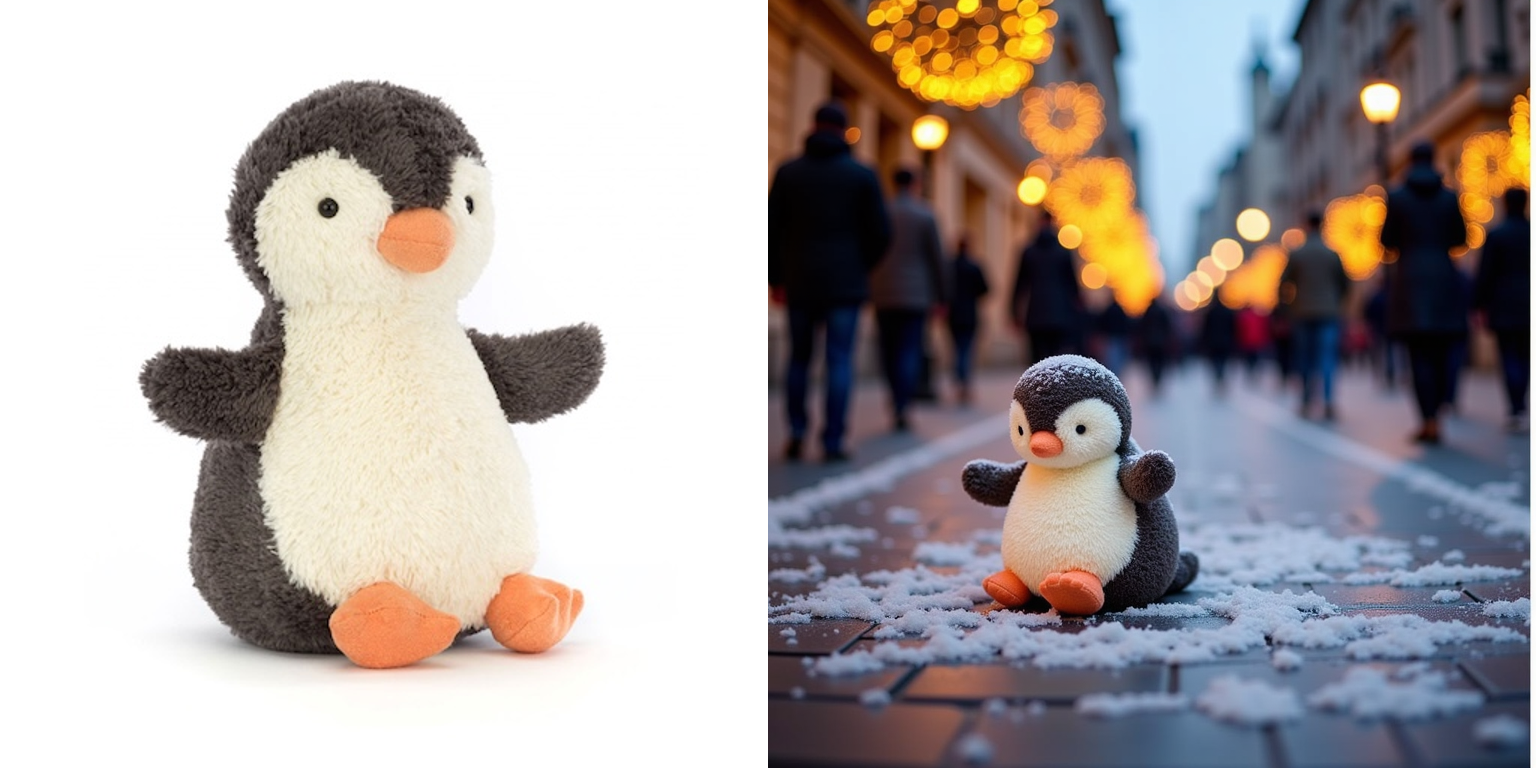

In [35]:
concat_image

  0%|          | 0/48 [00:00<?, ?it/s]

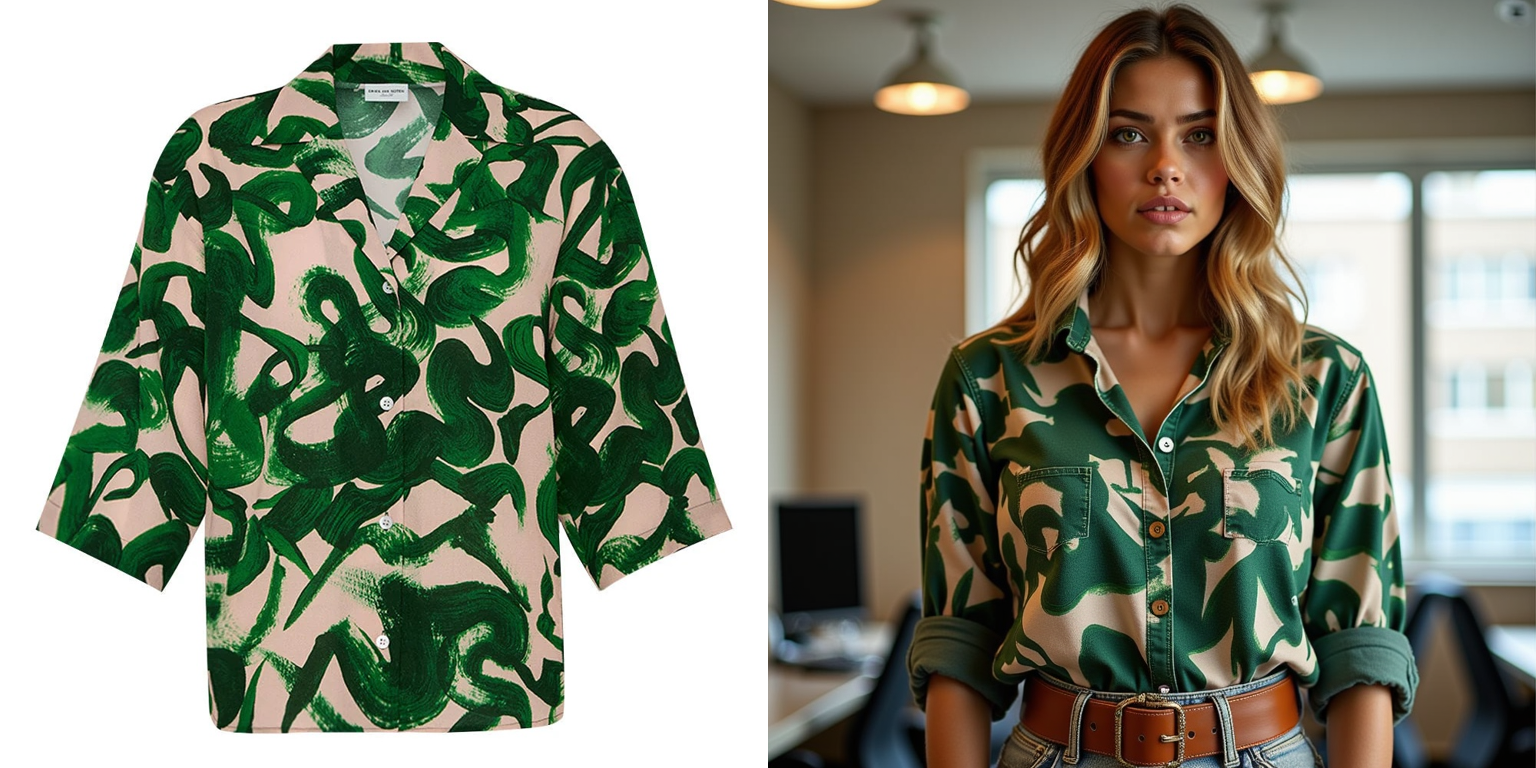

In [38]:
# seed_everything(199)
image = Image.open("assets/tshirt.jpg").convert("RGB").resize((768, 768))

condition = Condition("subject", image, position_delta=(0, -48))

prompt = "in the office, a lady She's wearing this item ,  front shot standing"




result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=48,
    height=768,
    width=768,
).images[0]

concat_image = Image.new("RGB", (768*2, 768))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (768, 0))
concat_image

  0%|          | 0/30 [00:00<?, ?it/s]

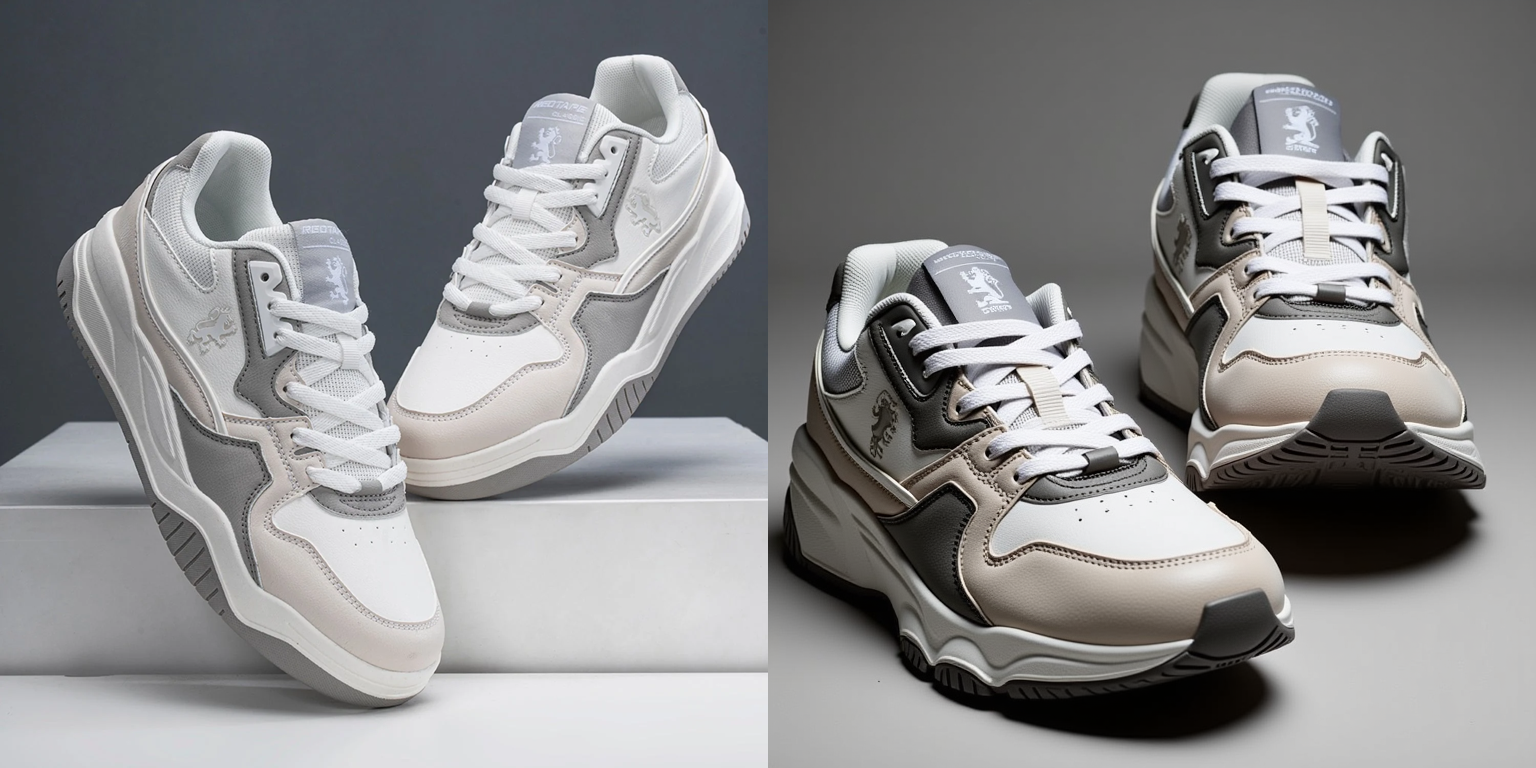

In [47]:
image = Image.open("assets/RSL0562_1.webp").convert("RGB").resize((768, 768))

condition = Condition("subject", image, position_delta=(0, -48))

prompt = "this item on the racing track"

# seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=30,
    height=768,
    width=768,
).images[0]

concat_image = Image.new("RGB", (768*2, 768))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (768, 0))
concat_image
# result_img

  0%|          | 0/8 [00:00<?, ?it/s]

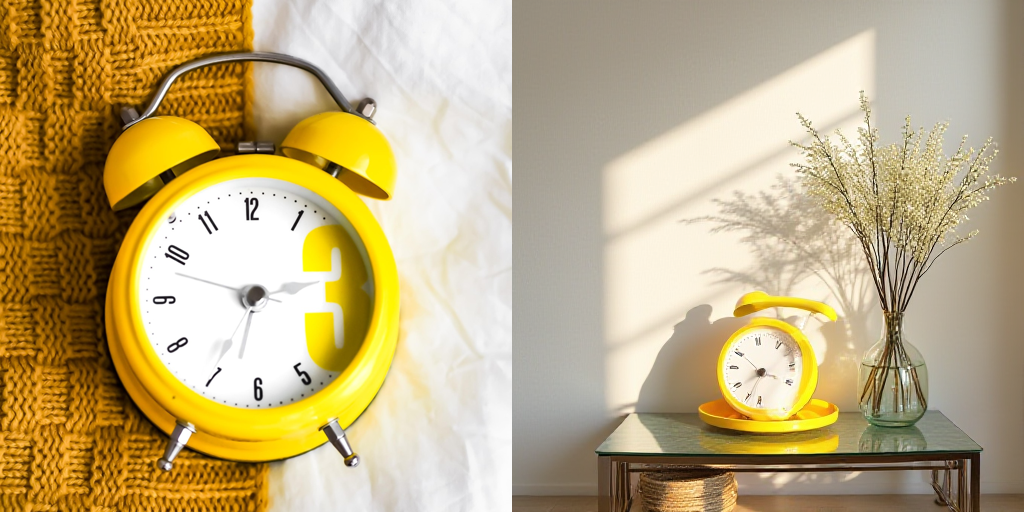

In [18]:
image = Image.open("assets/clock.jpg").convert("RGB").resize((512, 512))

condition = Condition("subject", image, position_delta=(0, 32))

prompt = "In a Bauhaus style room, this item is placed on a shiny glass table, with a vase of flowers next to it. In the afternoon sun, the shadows of the blinds are cast on the wall."

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=8,
    height=512,
    width=512,
).images[0]

concat_image = Image.new("RGB", (1024, 512))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (512, 0))
concat_image

  0%|          | 0/8 [00:00<?, ?it/s]

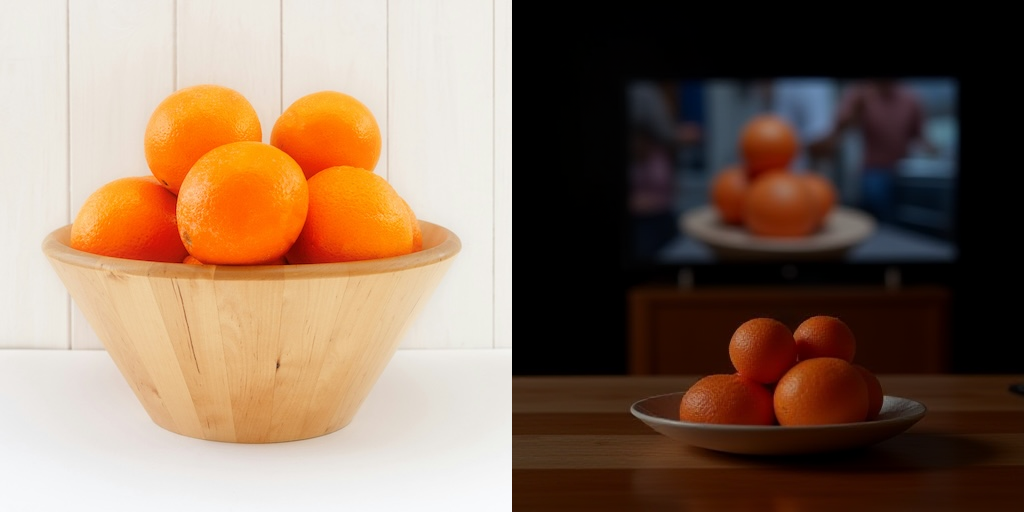

In [24]:
image = Image.open("assets/oranges.jpg").convert("RGB").resize((512, 512))

condition = Condition("subject", image, position_delta=(0, 32))

prompt = "A very close up view of this item. It is placed on a wooden table. The background is a dark room, the TV is on, and the screen is showing a cooking show."

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=8,
    height=512,
    width=512,
).images[0]

concat_image = Image.new("RGB", (1024, 512))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (512, 0))
concat_image